In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob 
from tqdm import tqdm

#sns.set(style="darkgrid")


In [2]:
data = pd.read_csv('dataset/preprocessed.csv')
#pipreqs /path/to/project

In [3]:
data.info() #Fix the size difference: 2 NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526168 entries, 0 to 526167
Data columns (total 3 columns):
Review      526121 non-null object
Polarity    526168 non-null int64
Useful      526168 non-null int64
dtypes: int64(2), object(1)
memory usage: 12.0+ MB


In [4]:
data.isna().any()

Review       True
Polarity    False
Useful      False
dtype: bool

In [5]:
data = data[data['Review'].notna()]

In [7]:
#Adding length of clean review 

reviewLen = data.apply(lambda row: len(row.Review), axis = 1)
data['ReviewLength'] = reviewLen

In [8]:
data.head()

,Review,Polarity,Useful,ReviewLength
0,tai stylist carol hair make wedding absolutely...,1,3,277
1,highly recommend sara looking great talented h...,1,5,1380
2,not know going costco could become hobby come ...,1,3,469
3,bit pricey consistently delicious service alwa...,1,0,106
4,ashley gave tour apartment nice helpful apartm...,1,0,70


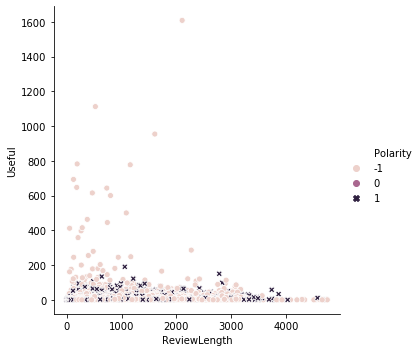

In [9]:
sns.relplot(x="ReviewLength", y="Useful", hue="Polarity", style="Polarity",  data=data)

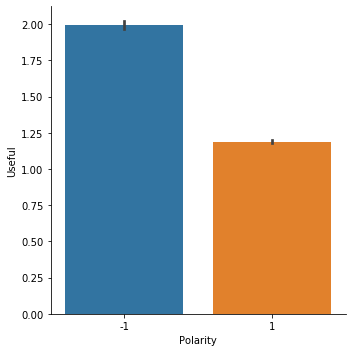

In [10]:
sns.catplot(x="Polarity", y="Useful", kind='bar' ,data=data)

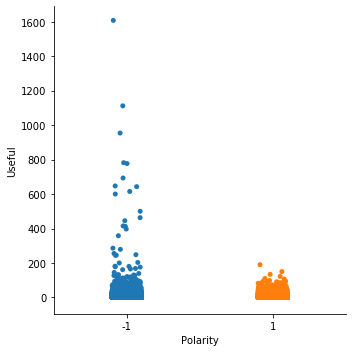

In [11]:
sns.catplot(x="Polarity", y="Useful" ,data=data)

In [12]:
def NumberOfPOSCounter(x):
    posCounters = [0] * 3
    tagPairs = TextBlob(x)
    #print(tagPairs.tags)
    for pairHere in (tagPairs.tags):
        tag = pairHere[1]
        if tag.startswith("NN"):
            posCounters[0] += 1
        elif tag.startswith("JJ"):
            posCounters[1] += 1
        elif tag.startswith("VB"):
            posCounters[2] += 1
    #print(posCounters) 
    return posCounters



In [13]:
i = 0
for idx, row in tqdm(data.iterrows()):
    #print(row['Review'])
    posCounters = NumberOfPOSCounter(row['Review'])
    data.at[idx, 'Nouns'] = posCounters[0]
    data.at[idx, 'Adjectives'] = posCounters[1]
    data.at[idx, 'Verbs'] = posCounters[2]

526121it [35:11, 249.19it/s]


In [14]:
data.isna().any()

Review          False
Polarity        False
Useful          False
ReviewLength    False
Nouns           False
Adjectives      False
Verbs           False
dtype: bool

In [15]:
data.head()

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
0,tai stylist carol hair make wedding absolutely...,1,3,277,22.0,8.0,6.0
1,highly recommend sara looking great talented h...,1,5,1380,79.0,38.0,55.0
2,not know going costco could become hobby come ...,1,3,469,26.0,14.0,18.0
3,bit pricey consistently delicious service alwa...,1,0,106,4.0,6.0,1.0
4,ashley gave tour apartment nice helpful apartm...,1,0,70,4.0,5.0,1.0


In [16]:
data.to_csv('dataset/data_with_tags.csv', index=False)